# archimedes_iocaml

This is a simple example of [Archimedes](http://archimedes.forge.ocamlcore.org/), 
an OCaml library for plotting high-quality 2D graphs.
You can embed graphs as PNG image in Jupyter notebooks.

In [1]:
#require "core";;
#use "archimedes_iocaml.ml";;
open Core ;;

/home/opam/.opam/4.04.1/lib/base/caml: added to search path
/home/opam/.opam/4.04.1/lib/base/caml/caml.cma: loaded
/home/opam/.opam/4.04.1/lib/base/shadow_stdlib: added to search path
/home/opam/.opam/4.04.1/lib/base/shadow_stdlib/shadow_stdlib.cma: loaded
/home/opam/.opam/4.04.1/lib/sexplib/0: added to search path
/home/opam/.opam/4.04.1/lib/sexplib/0/sexplib0.cma: loaded
/home/opam/.opam/4.04.1/lib/base: added to search path
/home/opam/.opam/4.04.1/lib/base/base.cma: loaded
/home/opam/.opam/4.04.1/lib/ocaml/unix.cma: loaded
/home/opam/.opam/4.04.1/lib/ocaml/bigarray.cma: loaded
/home/opam/.opam/4.04.1/lib/fieldslib: added to search path
/home/opam/.opam/4.04.1/lib/fieldslib/fieldslib.cma: loaded
/home/opam/.opam/4.04.1/lib/ppx_compare/runtime-lib: added to search path
/home/opam/.opam/4.04.1/lib/ppx_compare/runtime-lib/ppx_compare_lib.cma: loaded
/home/opam/.opam/4.04.1/lib/sexplib: added to search path
/home/opam/.opam/4.04.1/lib/sexplib/sexplib.cma: loaded
/home/opam/.opam/4.04.1/l

module Archimedes_iocaml : sig  end


## Plot a function

You can plot an OCaml function: $y = \sin(x)$.

File "[2]", line 4, characters 8-11:
Warning 3: deprecated: Core.sin
[since 2016-07] Use [Float.sin]


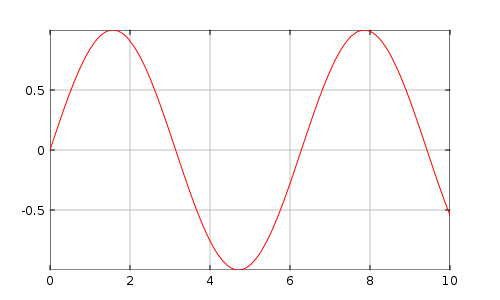

- : unit = ()

In [2]:
let vp = A.init ~w:500. ~h:300. ["iocaml"] in
A.Axes.box vp ;
A.set_color vp A.Color.red ;
A.fx vp sin 0. 10. ;
A.close vp

## Plot data points

Plot timeseries data of USD-EUR foreign exchange rates.

Data source: https://fred.stlouisfed.org/series/DEXUSEU

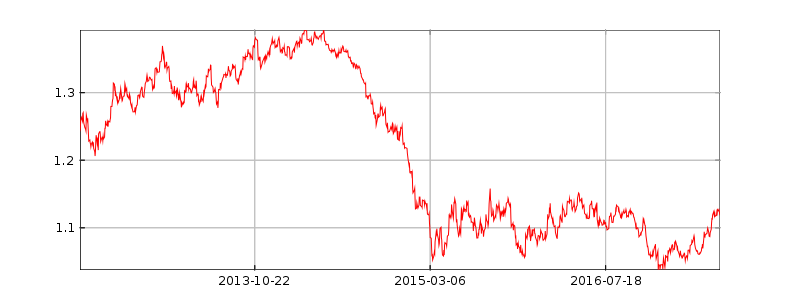

val zone : Core.Time.Zone.t = <abstr>

val days_of_string : string -> Core_kernel__.Import.float = <fun>

val string_of_days : Core_kernel__.Import.float -> string = <fun>

- : unit = ()

In [3]:
let zone = Time.Zone.utc ;;  (* Time zone is UTC *)

let days_of_string date_str =
    let date = Date.of_string date_str in                   (* Date (YYYY-MM-DD) *)
    Time.of_date_ofday ~zone date (Time.Ofday.start_of_day) (* DateTime (YYYY-MM-DD 00:00:00) *)
    |> Time.to_span_since_epoch                             (* # of seconds since poch *)
    |> Time.Span.to_day                                     (* # of days since epoch *)
;;
let string_of_days days =
    Time.Span.of_day days        (* # of days since epoch *)
    |> Time.of_span_since_epoch  (* # of seconds since epoch *)
    |> Time.to_date ~zone        (* DateTime (YYYY-MM-DD HH:MM:SS) *)
    |> Date.to_string            (* Date (YYYY-MM-DD) *)
;;
let usd_eur =
    In_channel.read_lines "datasets/DEXUSEU.csv"
    |> List.tl_exn                      (* Remove the CSV header line *)
    |> List.filter_map
        ~f:(fun line ->
            let (date_str, rate_str) = String.lsplit2_exn ~on:',' line in (* Split a CSV line by comma *)
            try Some (days_of_string date_str, float_of_string rate_str)
            with _ -> None)
in
let vp = A.init ~w:800. ~h:300. ["iocaml"] in
A.Axes.box vp ~tics:(A.Tics.Auto A.Tics.No_label) ;
A.Axes.x vp ~grid:true ~tics:(A.Tics.Auto (A.Tics.Custom string_of_days)) ;
A.Axes.y vp ~grid:true ;
A.set_color vp A.Color.red ;
A.List.xy_pairs vp ~style:`Lines usd_eur ;
A.close vp